<a href="https://colab.research.google.com/github/jazu1412/PYCARET_LOWCODE_ML/blob/main/Regression/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction

In [2]:
# Install PyCaret if not already installed
!pip install pycaret[full]
!pip install gradio;
!pip install pycaret[mlops]

# check installed version (must be >3.0)
import pycaret
pycaret.__version__


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 65.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This 

'3.3.2'

In [ ]:
import pandas as pd
### load sample dataset from pycaret dataset module
from pycaret.datasets import get_data
from google.colab import files
uploaded_files = files.upload()
data = pd.read_csv('Real estate.csv')
print(f"Successfully loaded {len(data)} rows.")


Saving Real estate.csv to Real estate (1).csv
Successfully loaded 414 rows.


In [ ]:
print(data['Y house price of unit area'].unique())

[ 37.9  42.2  47.3  54.8  43.1  32.1  40.3  46.7  18.8  22.1  41.4  58.1
  39.3  23.8  34.3  50.5  70.1  37.4  42.3  47.7  29.3  51.6  24.6  47.9
  38.8  27.   56.2  33.6  47.   57.1  25.   34.2  49.3  55.1  27.3  22.9
  25.3  46.2  15.9  18.2  34.7  34.1  53.9  38.3  42.   61.5  13.4  13.2
  44.2  20.7  38.9  51.7  13.7  41.9  53.5  22.6  42.4  21.3  63.2  27.7
  55.   44.3  50.7  56.8  36.2  59.   40.8  36.3  20.   54.4  29.5  36.8
  25.6  29.8  26.5  48.1  17.7  43.7  50.8  18.3  48.   45.4  43.2  21.8
  16.1  41.   51.8  59.5  34.6  51.   62.2  38.2  32.9  45.7  30.5  71.
  47.1  26.6  28.4  39.4  23.1   7.6  53.3  46.4  12.2  13.   30.6  59.6
  31.3  32.5  45.5  57.4  48.6  62.9  60.7  37.5  30.7  39.5  20.8  46.8
  47.4  43.5  42.5  51.4  28.9  40.1  52.2  45.1  39.7  48.5  44.7  40.9
  15.6  35.6  57.8  39.6  11.6  55.5  55.2  73.6  43.4  23.5  14.4  58.8
  35.1  45.2  36.5  19.2  36.7  42.6  15.5  55.9  23.6  21.5  25.7  22.
  20.5  37.8  42.7  36.6  48.2  39.1  31.6  25.5  45.

In [ ]:
import pandas as pd
from pycaret.regression import *






  # init setup on exp
setup(data, target = 'Y house price of unit area', session_id = 456)


,Description,Value
0,Session id,456
1,Target,Y house price of unit area
2,Target type,Regression
3,Original data shape,"(414, 8)"
4,Transformed data shape,"(414, 8)"
5,Transformed train set shape,"(289, 8)"
6,Transformed test set shape,"(125, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,5.1188,67.9117,7.7908,0.6724,0.1954,0.1495,0.3630
et,Extra Trees Regressor,5.0254,75.3096,8.0143,0.6486,0.1963,0.1467,0.1760
gbr,Gradient Boosting Regressor,5.6024,76.0443,8.2305,0.6346,0.2058,0.1598,0.0910
ada,AdaBoost Regressor,5.9250,76.7281,8.3216,0.6273,0.2198,0.1805,0.0860
catboost,CatBoost Regressor,5.3930,79.7278,8.2626,0.6271,0.2041,0.1567,1.9470
lightgbm,Light Gradient Boosting Machine,5.6427,79.1628,8.3245,0.6219,0.2078,0.1632,0.0620
xgboost,Extreme Gradient Boosting,5.6908,78.0969,8.3752,0.6176,0.2144,0.1682,0.1010
lar,Least Angle Regression,6.2937,87.1972,8.8292,0.5796,0.2624,0.1960,0.0320
lr,Linear Regression,6.2937,87.1972,8.8292,0.5796,0.2624,0.1960,0.6210
ridge,Ridge Regression,6.3942,89.9087,9.0247,0.5612,0.2790,0.2019,0.0230


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.6478,20.9144,4.5732,0.8790,0.1182,0.1028
1,6.9345,97.2308,9.8606,0.4763,0.2368,0.2034
2,5.0646,44.8626,6.6980,0.6375,0.1762,0.1454
3,6.3554,95.4295,9.7688,0.6320,0.2194,0.1585
4,5.7992,57.5777,7.5880,0.7238,0.2231,0.1926
5,5.3357,69.3911,8.3301,0.6686,0.3116,0.2366
6,7.4779,276.8770,16.6396,0.3249,0.2795,0.1605
7,4.3366,35.2789,5.9396,0.6660,0.1670,0.1326
8,3.0064,17.1597,4.1424,0.8504,0.1086,0.0836


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

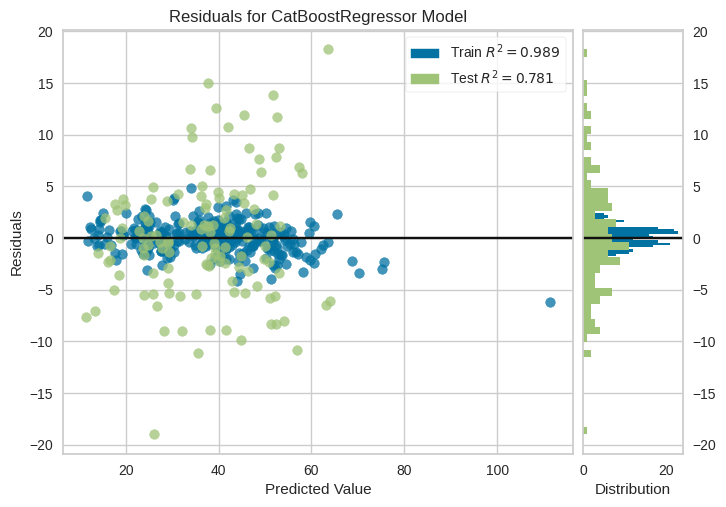

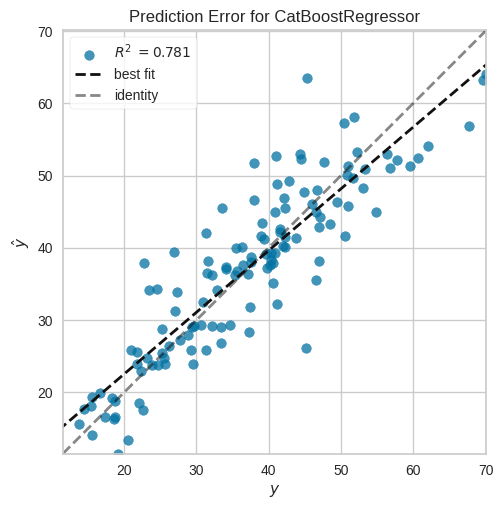

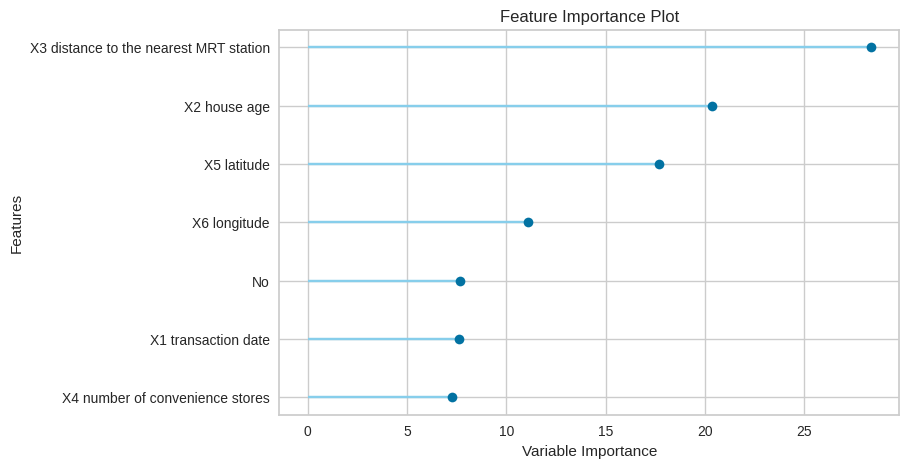

In [ ]:

# compare baseline models
best = compare_models()

# compare models using OOP
# exp.compare_models()

best = create_model('catboost') #choose catboost to avoid plot errors with some models

# plot residuals
plot_model(best, plot = 'residuals')

# plot error
plot_model(best, plot = 'error')

# plot feature importance
plot_model(best, plot = 'feature')


In [ ]:

# copy data and drop charges

new_data = data.copy()
new_data.drop('Y house price of unit area', axis=1, inplace=True)
new_data.head()

# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,prediction_label
0,1,2012.916992,32.0,84.878822,10,24.982981,121.540237,46.573311
1,2,2012.916992,19.5,306.594696,9,24.980339,121.539513,45.539822
2,3,2013.583008,13.3,561.984497,5,24.987459,121.543907,46.489078
3,4,2013.500000,13.3,561.984497,5,24.987459,121.543907,44.936010
4,5,2012.833008,5.0,390.568390,5,24.979370,121.542450,44.910627


In [ ]:

"""___

## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.
"""

# save pipeline
save_model(best, 'my_first_pipeline')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['No', 'X1 transaction date',
                                              'X2 house age',
                                              'X3 distance to the nearest MRT '
                                              'station',
                                              'X4 number of convenience stores',
                                              'X5 latitude', 'X6 longitude'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model',
                  <catboost.core.CatBoostRegressor object at 0x7d1ef45431c0>)]),
 'my_first_

In [ ]:

# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline


Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['No', 'X1 transaction date',
                                             'X2 house age',
                                             'X3 distance to the nearest MRT '
                                             'station',
                                             'X4 number of convenience stores',
                                             'X5 latitude', 'X6 longitude'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x7d1ef4e816f0>)])

In [ ]:

# check all available config
get_config()


{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [ ]:

# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))


The current seed is: 456


In [ ]:


# train linear regression with default fold=10
lr = create_model('lr')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.0766,40.6788,6.3780,0.7646,0.3878,0.1723
1,6.8589,70.6050,8.4027,0.6197,0.2341,0.2066
2,6.1653,59.8058,7.7334,0.5168,0.2124,0.1867
3,8.5783,128.1773,11.3215,0.5057,0.3574,0.2785
4,5.6772,58.0520,7.6192,0.7215,0.2453,0.1726
5,7.3855,112.7696,10.6193,0.4615,0.3528,0.3065
6,7.4903,254.9352,15.9667,0.3784,0.2824,0.1780
7,5.0383,38.3245,6.1907,0.6372,0.1770,0.1610
8,4.0885,23.2182,4.8185,0.7976,0.1452,0.1188


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:

"""The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe."""

lr_results = pull()
print(type(lr_results))
lr_results


<class 'pandas.core.frame.DataFrame'>


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.0766,40.6788,6.3780,0.7646,0.3878,0.1723
1,6.8589,70.6050,8.4027,0.6197,0.2341,0.2066
2,6.1653,59.8058,7.7334,0.5168,0.2124,0.1867
3,8.5783,128.1773,11.3215,0.5057,0.3574,0.2785
4,5.6772,58.0520,7.6192,0.7215,0.2453,0.1726
5,7.3855,112.7696,10.6193,0.4615,0.3528,0.3065
6,7.4903,254.9352,15.9667,0.3784,0.2824,0.1780
7,5.0383,38.3245,6.1907,0.6372,0.1770,0.1610
8,4.0885,23.2182,4.8185,0.7976,0.1452,0.1188


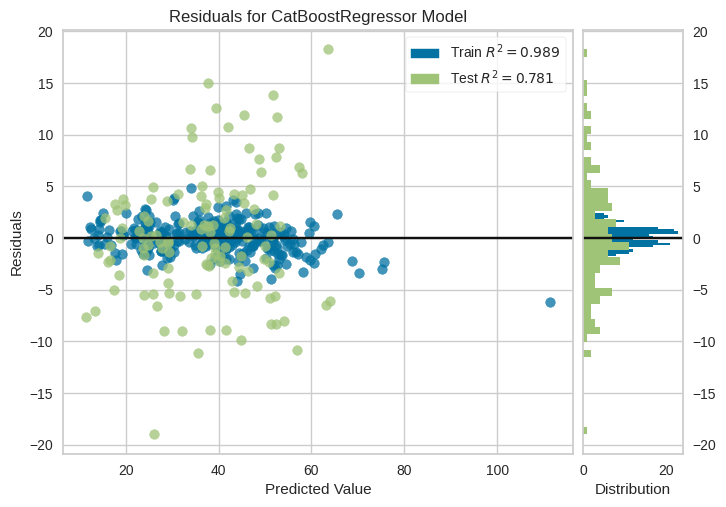

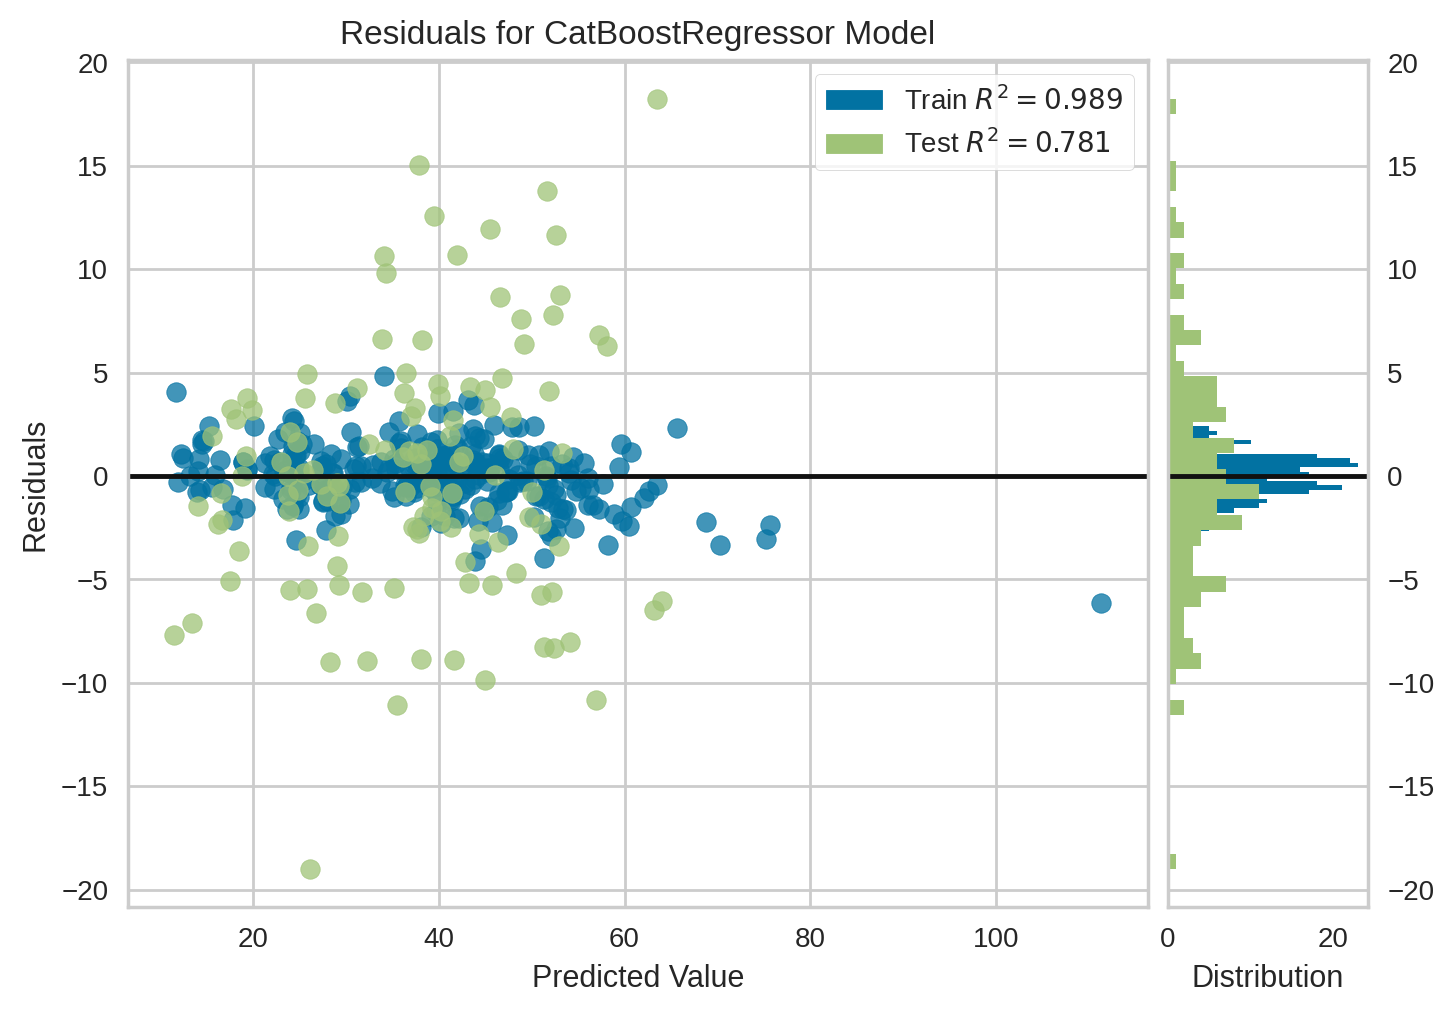

'Residuals.png'

In [ ]:


# plot residuals
plot_model(best, plot = 'residuals')

# to control the scale of plot
plot_model(best, plot = 'residuals', scale = 2)

# to save the plot
plot_model(best, plot = 'residuals', save=True)


In [ ]:

new_data = data.copy().drop('Y house price of unit area', axis = 1)
predictions = predict_model(best, data = new_data)

In [ ]:
predictions

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,prediction_label
0,1,2012.916992,32.000000,84.878822,10,24.982981,121.540237,46.573311
1,2,2012.916992,19.500000,306.594696,9,24.980339,121.539513,45.539822
2,3,2013.583008,13.300000,561.984497,5,24.987459,121.543907,46.489078
3,4,2013.500000,13.300000,561.984497,5,24.987459,121.543907,44.936010
4,5,2012.833008,5.000000,390.568390,5,24.979370,121.542450,44.910627
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.700000,4082.014893,0,24.941549,121.503807,18.144825
410,411,2012.666992,5.600000,90.456062,9,24.974331,121.543098,50.470090
411,412,2013.250000,18.799999,390.969604,7,24.979231,121.539864,40.668000
412,413,2013.000000,8.100000,104.810097,5,24.966740,121.540672,51.378813


In [ ]:


# train lightgbm model
lightgbm = create_model('lightgbm')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.8126,23.2450,4.8213,0.8655,0.1301,0.1126
1,6.7294,80.0250,8.9457,0.5690,0.2183,0.1912
2,5.6143,52.9150,7.2743,0.5725,0.1872,0.1575
3,6.3899,88.4853,9.4067,0.6587,0.2245,0.1657
4,5.5719,52.9222,7.2748,0.7461,0.2230,0.1859
5,5.8673,74.2951,8.6195,0.6452,0.3190,0.2487
6,7.3743,271.7232,16.4840,0.3375,0.2764,0.1607
7,4.1509,30.3176,5.5061,0.7130,0.1551,0.1246
8,4.2000,31.9422,5.6517,0.7216,0.1355,0.1151


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:


# get leaderboard
lb = get_leaderboard()
lb


Processing:   0%|          | 0/26 [00:00<?, ?it/s]

,Model Name,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
Index,,,,,,,,
0,Linear Regression,"(TransformerWrapper(include=['No', 'X1 transac...",6.2937,87.1972,8.8292,0.5796,0.2624,0.1960
1,Lasso Regression,"(TransformerWrapper(include=['No', 'X1 transac...",6.4297,91.9508,9.1566,0.5476,0.2806,0.2046
2,Ridge Regression,"(TransformerWrapper(include=['No', 'X1 transac...",6.3942,89.9087,9.0247,0.5612,0.2790,0.2019
3,Elastic Net,"(TransformerWrapper(include=['No', 'X1 transac...",6.4251,91.8332,9.1502,0.5482,0.2803,0.2046
4,Least Angle Regression,"(TransformerWrapper(include=['No', 'X1 transac...",6.2937,87.1972,8.8292,0.5796,0.2624,0.1960
5,Lasso Least Angle Regression,"(TransformerWrapper(include=['No', 'X1 transac...",6.4297,91.9507,9.1566,0.5476,0.2806,0.2046
6,Orthogonal Matching Pursuit,"(TransformerWrapper(include=['No', 'X1 transac...",7.2654,106.7505,9.9914,0.4613,0.2745,0.2332
7,Bayesian Ridge,"(TransformerWrapper(include=['No', 'X1 transac...",6.4228,92.0026,9.1533,0.5482,0.2778,0.2045
8,Passive Aggressive Regressor,"(TransformerWrapper(include=['No', 'X1 transac...",8.9120,150.8756,11.7275,0.2283,0.3390,0.2782


In [ ]:

# select the best model based on MAE
lb.sort_values(by='MAE', ascending=True)['Model'].iloc[0]
lb


,Model Name,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
Index,,,,,,,,
0,Linear Regression,"(TransformerWrapper(include=['No', 'X1 transac...",6.2937,87.1972,8.8292,0.5796,0.2624,0.1960
1,Lasso Regression,"(TransformerWrapper(include=['No', 'X1 transac...",6.4297,91.9508,9.1566,0.5476,0.2806,0.2046
2,Ridge Regression,"(TransformerWrapper(include=['No', 'X1 transac...",6.3942,89.9087,9.0247,0.5612,0.2790,0.2019
3,Elastic Net,"(TransformerWrapper(include=['No', 'X1 transac...",6.4251,91.8332,9.1502,0.5482,0.2803,0.2046
4,Least Angle Regression,"(TransformerWrapper(include=['No', 'X1 transac...",6.2937,87.1972,8.8292,0.5796,0.2624,0.1960
5,Lasso Least Angle Regression,"(TransformerWrapper(include=['No', 'X1 transac...",6.4297,91.9507,9.1566,0.5476,0.2806,0.2046
6,Orthogonal Matching Pursuit,"(TransformerWrapper(include=['No', 'X1 transac...",7.2654,106.7505,9.9914,0.4613,0.2745,0.2332
7,Bayesian Ridge,"(TransformerWrapper(include=['No', 'X1 transac...",6.4228,92.0026,9.1533,0.5482,0.2778,0.2045
8,Passive Aggressive Regressor,"(TransformerWrapper(include=['No', 'X1 transac...",8.9120,150.8756,11.7275,0.2283,0.3390,0.2782


In [ ]:


# help(get_leaderboard)

"""## ✅ AutoML
This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.
"""

# find best model based on CV metrics
exp.automl()


RandomForestRegressor(n_jobs=-1, random_state=456)

In [ ]:
create_app(best)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://4f498430cb8111cbe6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
